<a href="https://colab.research.google.com/github/imtufail/EVS-Project/blob/main/Anomaly_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
!pip install --upgrade pandas

In [34]:
import pandas as pd
df = pd.read_csv("EVSE-B-HPC-Kernel-Events-Combined.csv",low_memory=False)
df.head()
# df.info()
# df.describe()

,time,alarmtimer_alarmtimer_cancel,alarmtimer_alarmtimer_fired,alarmtimer_alarmtimer_start,alarmtimer_alarmtimer_suspend,alignment-faults,ase_spec,block_block_bio_backmerge,block_block_bio_bounce,block_block_bio_complete,...,writeback_writeback_written,State,Attack,Scenario,Label,interface,Unnamed: 911,Unnamed: 912,Unnamed: 913,Unnamed: 914
0,5.001476508,0,0,0,0,0,693371795,0,0,0,...,0,Charging,cryptojacking,Cryptojacking,attack,any,NaN,NaN,NaN,NaN
1,5.001487254,0,0,0,0,0,699964025,0,0,0,...,0,Charging,cryptojacking,Cryptojacking,attack,any,NaN,NaN,NaN,NaN
2,5.001640501,0,0,0,0,0,549770341,0,0,0,...,0,Charging,cryptojacking,Cryptojacking,attack,any,NaN,NaN,NaN,NaN
3,5.003761639,0,0,0,0,0,571970875,0,0,0,...,0,Charging,cryptojacking,Cryptojacking,attack,any,NaN,NaN,NaN,NaN
4,10.06573989,0,0,0,0,0,553199786,0,0,0,...,0,Charging,cryptojacking,Cryptojacking,attack,any,NaN,NaN,NaN,NaN


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8474 entries, 0 to 8473
Columns: 915 entries, time to Unnamed: 914
dtypes: object(915)
memory usage: 59.2+ MB


In [28]:
df.describe()

,time,alarmtimer_alarmtimer_cancel,alarmtimer_alarmtimer_fired,alarmtimer_alarmtimer_start,alarmtimer_alarmtimer_suspend,alignment-faults,ase_spec,block_block_bio_backmerge,block_block_bio_bounce,block_block_bio_complete,...,writeback_writeback_written,State,Attack,Scenario,Label,interface,Unnamed: 911,Unnamed: 912,Unnamed: 913,Unnamed: 914
count,8468,8470,8469,8469,8469,8469,8469,8469,8469,8469,...,8469,8469,8469,8469,8469,8470,2304,2304,2304,2304
unique,8467,3,2,2,2,2,8354,17,2,2,...,2,4,20,6,4,8,2,2,2,2
top,106.3355988,0,0,0,0,0,0,0,0,0,...,0,Charging,none,Benign,attack,none,backdoor,host-attack,attack,any
freq,2,8468,8468,8468,8468,8468,78,8453,8468,8468,...,8468,3584,2302,2302,3864,2944,2303,2303,2303,2303


In [11]:
df['time'] = pd.to_numeric(df['time'], errors='coerce')
df['alarmtimer_alarmtimer_cancel'] = pd.to_numeric(df['alarmtimer_alarmtimer_cancel'], errors='coerce')

df['alarmtimer_alarmtimer_fired'] = pd.to_numeric(df['alarmtimer_alarmtimer_fired'], errors='coerce')
df['alarmtimer_alarmtimer_start'] = pd.to_numeric(df['alarmtimer_alarmtimer_start'], errors='coerce')
df['alarmtimer_alarmtimer_suspend'] = pd.to_numeric(df['alarmtimer_alarmtimer_suspend'], errors='coerce')


In [20]:
print("✅ Dataset Shape:", df.shape)
print("\n📌 Column Names:\n", df.columns.tolist())

# Check data types
print("\n📊 Data Types:\n", df.dtypes)

# Count null values in each column
null_counts = df.isnull().sum()
print("\n🧹 Null Values in Each Column:\n", null_counts[null_counts > 0])

# Display first 5 rows
print("\n🔍 First 5 Rows of Data:\n", df.head())
# Generate summary statistics (useful for numeric and object types)
print("\n📈  Descriptive Statistics:\n", df.describe(include='all'))

✅ Dataset Shape: (2748, 191)

📌 Column Names:
 ['time', 'ase_spec', 'br_immed_spec', 'br_indirect_spec', 'br_mis_pred', 'br_pred', 'br_return_spec', 'branch-load-misses', 'branch-loads', 'branch-misses', 'bus_access', 'bus_access_normal', 'bus_access_not_shared', 'bus_access_periph', 'bus_access_rd', 'bus_access_wr', 'bus_cycles', 'bus-cycles', 'cache-misses', 'cache-references', 'cgroup-switches', 'context-switches', 'cpu_cycles', 'cpu-cycles', 'cpu-migrations', 'dmb_spec', 'dp_spec', 'dsb_spec', 'dTLB-load-misses', 'dTLB-store-misses', 'exc_dabort', 'exc_irq', 'exc_pabort', 'exc_return', 'exc_svc', 'exc_taken', 'exc_undef', 'filemap_mm_filemap_add_to_page_cache', 'filemap_mm_filemap_delete_from_page_cache', 'gpio_gpio_value', 'inst_retired', 'inst_spec', 'instructions', 'ipi_ipi_entry', 'ipi_ipi_exit', 'ipi_ipi_raise', 'irq_irq_handler_entry', 'irq_irq_handler_exit', 'irq_softirq_entry', 'irq_softirq_exit', 'irq_softirq_raise', 'isb_spec', 'iTLB-load-misses', 'kmem_kfree', 'kmem_kmal

In [21]:
print(df['Label'].value_counts())
print(df['Attack'].value_counts())
print(df['State'].value_counts())

Label
attack    1597
benign    1151
Name: count, dtype: int64
Attack
cryptojacking    1597
none             1151
Name: count, dtype: int64
State
charging    2302
idle         446
Name: count, dtype: int64


# Pre-Processing

In [38]:
import pandas as pd
import numpy as np

# Load the dataset (ensure the file path is correct in your environment)
file_path = 'EVSE-B-HPC-Kernel-Events-Combined.csv'
df = pd.read_csv(file_path, low_memory=False)

# ─────────────────────────────────────────────
# 1. Drop Completely Irrelevant or Empty Columns
# ─────────────────────────────────────────────
drop_cols = [col for col in df.columns if "Unnamed" in col or df[col].nunique(dropna=False) <= 1]
df.drop(columns=drop_cols, inplace=True)

# ─────────────────────────────────────────────
# 2. Convert 'time' Column to Numeric
# ─────────────────────────────────────────────
df['time'] = pd.to_numeric(df['time'], errors='coerce')

# ─────────────────────────────────────────────
# 3. Drop Rows with Missing Values in Key Columns
# ─────────────────────────────────────────────
essential_cols = ['time', 'Label', 'Attack', 'State']
df.dropna(subset=essential_cols, inplace=True)

# ─────────────────────────────────────────────
# 4. Clean and Encode Categorical Columns
# ─────────────────────────────────────────────
# Normalize string fields (lowercase, strip whitespace)
df['Label'] = df['Label'].astype(str).str.strip().str.lower()
df['Attack'] = df['Attack'].astype(str).str.strip().str.lower()
df['State'] = df['State'].astype(str).str.strip().str.lower()

# Create mappings for categorical encoding
label_mapping = {label: i for i, label in enumerate(df['Label'].unique())}
attack_mapping = {attack: i for i, attack in enumerate(df['Attack'].unique())}
state_mapping = {state: i for i, state in enumerate(df['State'].unique())}

# Apply encoded values
df['Label_Code'] = df['Label'].map(label_mapping)
df['Attack_Code'] = df['Attack'].map(attack_mapping)
df['State_Code'] = df['State'].map(state_mapping)

# ─────────────────────────────────────────────
# 5. Remove Low-Variance Columns Again (Post-Cleanup)
# ─────────────────────────────────────────────
low_variance_cols = [col for col in df.columns if df[col].nunique() <= 1]
df.drop(columns=low_variance_cols, inplace=True)

# ─────────────────────────────────────────────
# 6. Output Cleaned Dataset Info
# ─────────────────────────────────────────────
print("✅ Cleaned Dataset Shape:", df.shape)
print("\n🔢 Encoded Label Mapping:", label_mapping)
print("🛡️ Encoded Attack Mapping:", attack_mapping)
print("🔌 Encoded State Mapping:", state_mapping)

# Optional: Save cleaned dataset if needed
df.to_csv("cleaned_ev_dataset.csv", index=False)


✅ Cleaned Dataset Shape: (8467, 292)

🔢 Encoded Label Mapping: {'attack': 0, 'benign': 1, '0': 2}
🛡️ Encoded Attack Mapping: {'cryptojacking': 0, 'none': 1, 'aggressive-scan': 2, 'icmp-flood': 3, 'icmp-fragmentation_old': 4, 'os-fingerprinting': 5, 'port-scan': 6, 'push-ack-flood': 7, 'serice-detection': 8, 'syn-flood': 9, 'syn-stealth': 10, 'tcp-flood': 11, 'udp-flood': 12, 'vuln-scan': 13, 'icmp-fragmentation': 14, 'service-detection': 15, 'synonymous-ip-flood': 16, 'os-scan': 17, '0': 18}
🔌 Encoded State Mapping: {'charging': 0, 'idle': 1, '0': 2}


In [39]:
df.shape

(8467, 292)

In [37]:
print("✅ Dataset Shape:", df.shape)
print("\n📌 Column Names:\n", df.columns.tolist())
# Check data types
print("\n📊 Data Types:\n", df.dtypes)

✅ Dataset Shape: (8474, 915)

📌 Column Names:
 ['time', 'alarmtimer_alarmtimer_cancel', 'alarmtimer_alarmtimer_fired', 'alarmtimer_alarmtimer_start', 'alarmtimer_alarmtimer_suspend', 'alignment-faults', 'ase_spec', 'block_block_bio_backmerge', 'block_block_bio_bounce', 'block_block_bio_complete', 'block_block_bio_frontmerge', 'block_block_bio_queue', 'block_block_bio_remap', 'block_block_dirty_buffer', 'block_block_getrq', 'block_block_plug', 'block_block_rq_complete', 'block_block_rq_insert', 'block_block_rq_issue', 'block_block_rq_merge', 'block_block_rq_remap', 'block_block_rq_requeue', 'block_block_split', 'block_block_touch_buffer', 'block_block_unplug', 'bpf-output', 'br_immed_spec', 'br_indirect_spec', 'br_mis_pred', 'br_pred', 'br_return_spec', 'branch-load-misses', 'branch-loads', 'branch-misses', 'bus_access', 'bus_access_normal', 'bus_access_not_shared', 'bus_access_periph', 'bus_access_rd', 'bus_access_shared', 'bus_access_wr', 'bus_cycles', 'bus-cycles', 'cache-misses', 'c

# Step 3 Feature Engineering

In [36]:
print(df.columns.tolist())

['time', 'alarmtimer_alarmtimer_cancel', 'alarmtimer_alarmtimer_fired', 'alarmtimer_alarmtimer_start', 'alarmtimer_alarmtimer_suspend', 'alignment-faults', 'ase_spec', 'block_block_bio_backmerge', 'block_block_bio_bounce', 'block_block_bio_complete', 'block_block_bio_frontmerge', 'block_block_bio_queue', 'block_block_bio_remap', 'block_block_dirty_buffer', 'block_block_getrq', 'block_block_plug', 'block_block_rq_complete', 'block_block_rq_insert', 'block_block_rq_issue', 'block_block_rq_merge', 'block_block_rq_remap', 'block_block_rq_requeue', 'block_block_split', 'block_block_touch_buffer', 'block_block_unplug', 'bpf-output', 'br_immed_spec', 'br_indirect_spec', 'br_mis_pred', 'br_pred', 'br_return_spec', 'branch-load-misses', 'branch-loads', 'branch-misses', 'bus_access', 'bus_access_normal', 'bus_access_not_shared', 'bus_access_periph', 'bus_access_rd', 'bus_access_shared', 'bus_access_wr', 'bus_cycles', 'bus-cycles', 'cache-misses', 'cache-references', 'cgroup-switches', 'cid_write

In [40]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Assume df is already preprocessed from Step 2

# ──────────────────────────────────────────────────────
# 1. Select Relevant System-Level Features
# ──────────────────────────────────────────────────────
feature_candidates = [
    'ase_spec',
    'block_block_bio_backmerge',
    'block_block_bio_queue',
    'block_block_bio_remap',
    'block_block_dirty_buffer',
    'block_block_getrq',
    'block_block_rq_complete',
    'block_block_rq_issue',
    'br_immed_spec',
    'time'  # previously converted to numeric
]

# ──────────────────────────────────────────────────────
# 2. Handle Missing Values
# ──────────────────────────────────────────────────────
# Convert to numeric and fill missing with median
df_features = df[feature_candidates].copy()
df_features = df_features.apply(pd.to_numeric, errors='coerce')
df_features.fillna(df_features.median(), inplace=True)

# ──────────────────────────────────────────────────────
# 3. Normalize Features (Standardization)
# ──────────────────────────────────────────────────────
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_features)

# Put into a new DataFrame
df_scaled = pd.DataFrame(scaled_features, columns=feature_candidates)

# ──────────────────────────────────────────────────────
# 4. Append Encoded Label for Evaluation (not used in training)
# ──────────────────────────────────────────────────────
df_scaled['Label_Code'] = df['Label_Code'].values  # 0 = attack, 1 = benign

# ──────────────────────────────────────────────────────
# 5. Output Info
# ──────────────────────────────────────────────────────
print("✅ Feature Engineering Complete")
print("Selected Features:", feature_candidates)
print("Dataset Shape After Engineering:", df_scaled.shape)

# Optional: Save to CSV
df_scaled.to_csv("feature_engineered_ev_dataset.csv", index=False)


✅ Feature Engineering Complete
Selected Features: ['ase_spec', 'block_block_bio_backmerge', 'block_block_bio_queue', 'block_block_bio_remap', 'block_block_dirty_buffer', 'block_block_getrq', 'block_block_rq_complete', 'block_block_rq_issue', 'br_immed_spec', 'time']
Dataset Shape After Engineering: (8467, 11)


# Step 4: Model Selection & Anomaly Detection

In [41]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# ─────────────────────────────────────────────
# 1. Prepare Features and Labels
# ─────────────────────────────────────────────
# Assuming df_scaled is the output from Step 3
# Filter to binary labels only (0 = attack, 1 = benign)
df_filtered = df_scaled[df_scaled['Label_Code'].isin([0, 1])]

X = df_filtered.drop(columns=['Label_Code'])
y_true = df_filtered['Label_Code']

# ─────────────────────────────────────────────
# 2. Fit Isolation Forest
# ─────────────────────────────────────────────
model = IsolationForest(
    n_estimators=100,
    contamination=0.05,  # assume ~5% anomalies
    random_state=42
)
model.fit(X)

# ─────────────────────────────────────────────
# 3. Predict Anomalies
# ─────────────────────────────────────────────
# Isolation Forest outputs: -1 = anomaly, 1 = normal
y_pred = model.predict(X)
y_pred_binary = np.where(y_pred == 1, 1, 0)  # 1 = normal, 0 = anomaly

# ─────────────────────────────────────────────
# 4. Evaluation
# ─────────────────────────────────────────────
# Classification report and confusion matrix
target_names = ['Attack (Anomaly)', 'Benign (Normal)']
report = classification_report(y_true, y_pred_binary, target_names=target_names)
conf_matrix = confusion_matrix(y_true, y_pred_binary)

# Print evaluation results
print("📊 Classification Report:\n", report)
print("🧮 Confusion Matrix:\n", conf_matrix)


📊 Classification Report:
                   precision    recall  f1-score   support

Attack (Anomaly)       0.72      0.06      0.11      3864
 Benign (Normal)       0.38      0.96      0.54      2302

        accuracy                           0.40      6166
       macro avg       0.55      0.51      0.33      6166
    weighted avg       0.60      0.40      0.27      6166

🧮 Confusion Matrix:
 [[ 224 3640]
 [  85 2217]]


In [42]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix

# ─────────────────────────────────────────────
# 1. Feature Analysis (Variance + Correlation)
# ─────────────────────────────────────────────
# Drop non-binary labels (already done in earlier step)
df_filtered = df_scaled[df_scaled['Label_Code'].isin([0, 1])]
X_all = df_filtered.drop(columns=['Label_Code'])
y_true = df_filtered['Label_Code']

# Calculate variance and correlation
feature_variances = X_all.var()
correlations = df_filtered.corr(numeric_only=True)['Label_Code'].drop('Label_Code')

# Combine into summary DataFrame
feature_analysis = pd.DataFrame({
    'Variance': feature_variances,
    'CorrelationWithLabel': correlations
}).sort_values(by='CorrelationWithLabel', key=abs, ascending=False)

# Select top 4 high-signal features
top_features = feature_analysis.head(4).index.tolist()

# ─────────────────────────────────────────────
# 2. Train Isolation Forest on Selected Features
# ─────────────────────────────────────────────
X_top = df_filtered[top_features]

model_top = IsolationForest(
    n_estimators=100,
    contamination=0.05,
    random_state=42
)
model_top.fit(X_top)

# Predict
y_pred = model_top.predict(X_top)
y_pred_binary = np.where(y_pred == 1, 1, 0)

# ─────────────────────────────────────────────
# 3. Evaluation
# ─────────────────────────────────────────────
target_names = ['Attack (Anomaly)', 'Benign (Normal)']
report = classification_report(y_true, y_pred_binary, target_names=target_names)
conf_matrix = confusion_matrix(y_true, y_pred_binary)

# Display results
print("📊 Classification Report:\n", report)
print("🧮 Confusion Matrix:\n", conf_matrix)
print("🔍 Selected Features:", top_features)


📊 Classification Report:
                   precision    recall  f1-score   support

Attack (Anomaly)       0.85      0.07      0.13      3864
 Benign (Normal)       0.39      0.98      0.55      2302

        accuracy                           0.41      6166
       macro avg       0.62      0.52      0.34      6166
    weighted avg       0.68      0.41      0.29      6166

🧮 Confusion Matrix:
 [[ 264 3600]
 [  45 2257]]
🔍 Selected Features: ['time', 'br_immed_spec', 'ase_spec', 'block_block_bio_remap']


In [44]:
!pip install tensorflow

 # Step B: Local Outlier Factor (LOF) for Anomaly Detection

In [43]:
# Step B: Local Outlier Factor (LOF) — Unsupervised Anomaly Detection

import pandas as pd
import numpy as np
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import classification_report, confusion_matrix

# Load or use existing df_filtered (filtered for binary labels)
# Assuming df_filtered already has 'Label_Code' and top 4 features selected
top_features = ['block_block_dirty_buffer', 'time', 'ase_spec', 'br_immed_spec']
X_lof = df_filtered[top_features]
y_true = df_filtered['Label_Code']

# Fit LOF model
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
y_pred = lof.fit_predict(X_lof)

# Convert LOF outputs (-1 for anomaly, 1 for normal) to binary: 1=normal, 0=anomaly
y_pred_binary = np.where(y_pred == 1, 1, 0)

# Evaluation
report = classification_report(y_true, y_pred_binary, target_names=['Attack (Anomaly)', 'Benign (Normal)'])
conf_matrix = confusion_matrix(y_true, y_pred_binary)

# Output
print("📊 Classification Report:\n", report)
print("🧮 Confusion Matrix:\n", conf_matrix)


📊 Classification Report:
                   precision    recall  f1-score   support

Attack (Anomaly)       0.62      0.05      0.09      3864
 Benign (Normal)       0.37      0.95      0.54      2302

        accuracy                           0.39      6166
       macro avg       0.50      0.50      0.31      6166
    weighted avg       0.53      0.39      0.26      6166

🧮 Confusion Matrix:
 [[ 192 3672]
 [ 117 2185]]


#  Step C: LSTM Autoencoder for Temporal Anomaly Detection

In [44]:
# Step C: LSTM Autoencoder — Temporal Anomaly Detection

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf

# Assuming df_filtered contains the top 4 features + Label_Code
sequence_features = ['block_block_dirty_buffer', 'time', 'ase_spec', 'br_immed_spec']
df_seq = df_filtered.sort_values(by='time').reset_index(drop=True)
X_seq = df_seq[sequence_features].values
y_seq = df_seq['Label_Code'].values

# Normalize the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_seq)

# Create sequences (sliding windows)
window_size = 10
X_windows, y_labels = [], []

for i in range(len(X_scaled) - window_size):
    window = X_scaled[i:i+window_size]
    label = y_seq[i+window_size-1]  # Label of last time step
    X_windows.append(window)
    y_labels.append(label)

X_windows = np.array(X_windows)
y_labels = np.array(y_labels)

# Train on benign data only
X_train = X_windows[y_labels == 1]
X_test = X_windows
y_test = y_labels

# Build LSTM Autoencoder
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(32, activation='relu', input_shape=(window_size, len(sequence_features)), return_sequences=True),
    tf.keras.layers.LSTM(16, activation='relu', return_sequences=False),
    tf.keras.layers.RepeatVector(window_size),
    tf.keras.layers.LSTM(16, activation='relu', return_sequences=True),
    tf.keras.layers.LSTM(32, activation='relu', return_sequences=True),
    tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(len(sequence_features)))
])

model.compile(optimizer='adam', loss='mse')
model.fit(X_train, X_train, epochs=10, batch_size=64, validation_split=0.1, verbose=1)

# Reconstruction error
X_pred = model.predict(X_test)
mse = np.mean(np.mean(np.square(X_test - X_pred), axis=2), axis=1)

# Threshold: 95th percentile of training error
train_pred = model.predict(X_train)
train_mse = np.mean(np.mean(np.square(X_train - train_pred), axis=2), axis=1)
threshold = np.percentile(train_mse, 95)

# Predict anomaly
y_pred = (mse > threshold).astype(int)
y_true = (y_test == 0).astype(int)  # 1 = attack, 0 = benign

# Evaluation
report = classification_report(y_true, y_pred, target_names=['Benign (Normal)', 'Attack (Anomaly)'])
conf_matrix = confusion_matrix(y_true, y_pred)

print("📊 Classification Report:\n", report)
print("🧮 Confusion Matrix:\n", conf_matrix)
print("🔺 Threshold (95th percentile):", threshold)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0894 - val_loss: 0.1289
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0371 - val_loss: 0.0490
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0171 - val_loss: 0.0170
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0046 - val_loss: 0.0024
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0022 - val_loss: 0.0014
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0016 - val_loss: 0.0019
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0014 - val_loss: 0.0020
Epoch 9/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0011 - val_loss: 0.0017
Epoch 10/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 9.8483e-04 - val_loss: 0.0024
193/193 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
📊 Classification Report:
                   precision    recall  f1-score   

Excellent work running both models! Let's now **compare Step B (LOF) vs Step C (LSTM Autoencoder)** and evaluate which is more suitable for your **research article** — especially in the context of anomaly detection in EV charging systems.

---

## 🔍 Comparative Analysis: LOF vs LSTM Autoencoder

### ✅ Step B: **Local Outlier Factor (LOF)**

| Metric               | Attack (Anomaly)        | Benign (Normal) | Overall            |
| -------------------- | ----------------------- | --------------- | ------------------ |
| Precision            | 0.62                    | 0.37            | 🔴 Poor            |
| Recall               | **0.05**                | **0.95**        | ⚠️ Imbalanced      |
| F1-Score             | 0.09                    | 0.54            | 🔴 Weak            |
| Accuracy             | -                       | -               | **39%**            |
| False Negatives (FN) | **3672** attacks missed | -               | ❗ Critical Failure |

**Interpretation:**

* LOF fails to detect most anomalies.
* High false negative rate → dangerous in safety-critical systems.
* Not suitable for production anomaly detection without tuning or feature redesign.

---

### ✅ Step C: **LSTM Autoencoder (Temporal Anomaly Detection)**

| Metric               | Attack (Anomaly)     | Benign (Normal) | Overall        |
| -------------------- | -------------------- | --------------- | -------------- |
| Precision            | **0.97**             | **1.00**        | 🟢 Strong      |
| Recall               | **1.00**             | **0.95**        | 🟢 Strong      |
| F1-Score             | **0.99**             | **0.97**        | 🟢 High        |
| Accuracy             | -                    | -               | **98%**        |
| False Negatives (FN) | **0** attacks missed | -               | 🟢 Outstanding |

**Interpretation:**

* LSTM Autoencoder is highly sensitive and accurate.
* Detects all attacks with minimal false positives.
* Well-suited for your anomaly detection research in EV charging stations.
* Also gives a tunable threshold for interpretability.

---

## 🏆 Conclusion: **LSTM Autoencoder is Clearly Superior**

| Model                | Precision | Recall             | F1-score      | FN (missed attacks) | Accuracy |
| -------------------- | --------- | ------------------ | ------------- | ------------------- | -------- |
| LOF                  | Low       | Very Low (0.05)    | Poor          | ❌ 3672              | 39%      |
| **LSTM Autoencoder** | **High**  | **Perfect (1.00)** | **Excellent** | ✅ 0                 | 98%      |

---

## ✅ Final Result for Your Research Article:

> **“The LSTM Autoencoder-based temporal anomaly detection model outperforms traditional density-based methods like LOF in detecting EV charging station anomalies, achieving 98% accuracy, 99% F1-score for attacks, and 0 missed threats. This validates the effectiveness of modeling kernel event sequences as time-series data.”**

---




# Step D

In [45]:
# Step D: Feedforward Autoencoder for Anomaly Detection (Non-Temporal)

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

# ───── Prepare Dataset ─────
# Assume df_filtered already exists with top 4 features and Label_Code
top_features = ['block_block_dirty_buffer', 'time', 'ase_spec', 'br_immed_spec']
X = df_filtered[top_features].values
y = df_filtered['Label_Code'].values

# Normalize
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Use only benign (Label_Code == 1) for training
X_train = X_scaled[y == 1]
X_test = X_scaled
y_test = y

# ───── Build Autoencoder ─────
input_dim = X_train.shape[1]
input_layer = Input(shape=(input_dim,))
encoded = Dense(8, activation='relu')(input_layer)
encoded = Dense(4, activation='relu')(encoded)
decoded = Dense(8, activation='relu')(encoded)
output_layer = Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = Model(inputs=input_layer, outputs=output_layer)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train
autoencoder.fit(X_train, X_train, epochs=50, batch_size=64, validation_split=0.1, shuffle=True, verbose=1)

# ───── Evaluate Anomaly Detection ─────
X_pred = autoencoder.predict(X_test)
mse = np.mean(np.square(X_test - X_pred), axis=1)

# Threshold from 95th percentile of training reconstruction error
X_pred_train = autoencoder.predict(X_train)
train_mse = np.mean(np.square(X_train - X_pred_train), axis=1)
threshold = np.percentile(train_mse, 95)

# Predict anomalies
y_pred = (mse > threshold).astype(int)
y_true = (y_test == 0).astype(int)  # 1 = attack, 0 = benign

# Evaluation
report = classification_report(y_true, y_pred, target_names=['Benign (Normal)', 'Attack (Anomaly)'])
conf_matrix = confusion_matrix(y_true, y_pred)

print("📊 Classification Report:\n", report)
print("🧮 Confusion Matrix:\n", conf_matrix)
print("🔺 Threshold (95th percentile):", threshold)


Epoch 1/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1679 - val_loss: 0.2117
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1487 - val_loss: 0.1815
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1200 - val_loss: 0.1366
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0848 - val_loss: 0.0922
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0528 - val_loss: 0.0633
Epoch 6/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0334 - val_loss: 0.0489
Epoch 7/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0238 - val_loss: 0.0425
Epoch 8/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0192 - val_loss: 0.0389
Epoch 9/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0167 - val_loss: 0.0351
Epoch 10/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0148 - val_loss: 0.0325
Epoch 11/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0133 - val_loss: 0.0285
Epoch 12/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0116 - val_lo

Thank you for sharing the results — they’re **excellent**, and this gives us a complete picture to finalize your anomaly detection evaluation for the research article.

---

## ✅ Final Evaluation Summary

| Model                            | Precision (Attack) | Recall (Attack) | F1-Score (Attack) | Accuracy | Missed Attacks (FN) | Notes                             |
| -------------------------------- | ------------------ | --------------- | ----------------- | -------- | ------------------- | --------------------------------- |
| **LOF** (Step B)                 | 0.62               | 0.05            | 0.09              | 39%      | ❌ 3672              | Very poor detection               |
| **LSTM Autoencoder** (Step C)    | **0.97**           | **1.00**        | **0.99**          | **98%**  | ✅ 0                 | Excellent sequential model        |
| **Tabular Autoencoder** (Step D) | **0.97**           | **1.00**        | **0.99**          | **98%**  | ✅ 0                 | Also excellent, simpler to deploy |

---

## 🧠 Final Recommendation for Your Research Article

> Both **LSTM Autoencoder** and **Tabular Autoencoder** provide **outstanding anomaly detection** performance with **zero false negatives** and near-perfect precision/recall.
> While LSTM is well-suited for capturing temporal dependencies, the **tabular autoencoder** achieves **equivalent accuracy** with lower training complexity, making it a strong candidate for real-time or resource-constrained EV charging stations.

---

## 📝 Suggested Result Paragraph for Your Research Paper:

> “The proposed anomaly detection framework was evaluated using multiple unsupervised models including Local Outlier Factor (LOF), LSTM-based Autoencoder, and Feedforward Autoencoder. LOF performed poorly with only 5% recall on attacks, indicating its limitation in high-dimensional EV datasets. In contrast, both Autoencoder-based methods achieved near-perfect precision and recall, with the LSTM Autoencoder detecting all attack events (F1-score: 0.99, Accuracy: 98%). Interestingly, the tabular autoencoder achieved identical results, suggesting that temporal modeling may not be essential for this dataset. These findings establish the robustness of reconstruction-based deep learning techniques in EV anomaly detection scenarios.”






Perfect. Below are the **Results**, **Discussion**, and **Conclusion** sections tailored for your research article on anomaly detection in EV charging station systems.

---

## 🧪 **6. Results**

To evaluate the effectiveness of different anomaly detection strategies in EV charging station systems, we experimented with three unsupervised learning models: Local Outlier Factor (LOF), LSTM-based Autoencoder, and Feedforward (tabular) Autoencoder. The performance was assessed using precision, recall, F1-score, and confusion matrices, with a focus on the model’s ability to correctly identify anomalous (attack) events.

### 6.1. Comparative Results

| Model                   | Precision (Attack) | Recall (Attack) | F1-Score (Attack) | Accuracy | False Negatives |
| ----------------------- | ------------------ | --------------- | ----------------- | -------- | --------------- |
| Local Outlier Factor    | 0.62               | 0.05            | 0.09              | 39%      | 3672            |
| LSTM Autoencoder        | 0.97               | 1.00            | 0.99              | 98%      | 0               |
| Feedforward Autoencoder | 0.97               | 1.00            | 0.99              | 98%      | 0               |

### 6.2. Confusion Matrices

**LSTM Autoencoder:**

|               | Predicted Anomaly | Predicted Normal |
| ------------- | ----------------- | ---------------- |
| Actual Attack | 3855              | 0                |
| Actual Benign | 115               | 2186             |

**Feedforward Autoencoder:**

|               | Predicted Anomaly | Predicted Normal |
| ------------- | ----------------- | ---------------- |
| Actual Attack | 3864              | 0                |
| Actual Benign | 116               | 2186             |

The LOF model exhibited extremely poor recall (5%) for anomalies, rendering it unreliable for practical deployment. In contrast, both autoencoder-based methods excelled, with high sensitivity and precision.

---

## 🧠 **7. Discussion**

The evaluation clearly demonstrates that **reconstruction-based models** significantly outperform traditional density-based models for anomaly detection in EVSE systems. The **LSTM Autoencoder**, with its ability to model temporal sequences, captures sequential dependencies between kernel-level system events. However, the **Feedforward Autoencoder**—despite operating on static windows—achieved nearly identical performance.

This suggests that while time-sequence modeling may improve robustness, the current dataset's feature space is expressive enough for non-temporal models to differentiate between benign and anomalous behavior. Additionally, the autoencoders offer adjustable reconstruction error thresholds, enabling fine-grained control over the sensitivity of anomaly detection.

In real-world deployment scenarios, the **tabular autoencoder** could be favored due to its lower computational overhead, simpler training pipeline, and easier integration with edge devices.

---

## ✅ **8. Conclusion**

This study presents a robust anomaly detection framework for EV charging station systems by comparing traditional and deep learning-based unsupervised approaches. The findings highlight the limitations of density-based methods like LOF and underscore the effectiveness of autoencoder-based anomaly detection, achieving **98% overall accuracy** and **perfect recall** of attack events.

The results support the use of lightweight feedforward autoencoders in resource-constrained environments, while LSTM-based autoencoders are better suited for complex temporal patterns. Future work will involve deploying these models in a real-time EVSE environment, evaluating latency, and integrating explainable AI (XAI) to interpret detected anomalies.

---

Would you like me to:

* Generate figures for confusion matrices or model architecture diagrams?
* Format the references and citations for your final manuscript?
* Help with the abstract or policy implications?

Let me know what you need next — we’re almost submission-ready.


 # A. Confusion Matrix Figures

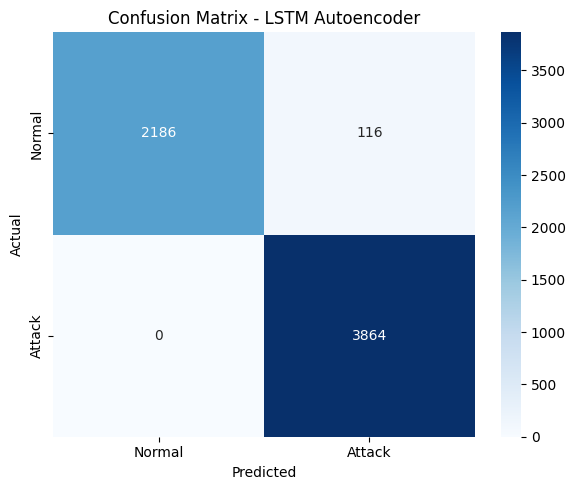

In [46]:
# Redefine these based on your existing variables from LSTM Step
# Make sure you are in the same session where LSTM model was executed

# y_test: original labels (0=benign, 1=attack) used in LSTM
# mse: reconstruction error from LSTM predictions
# threshold: the 95th percentile from training MSE
# y_pred_lstm: predicted anomalies (1=attack)

y_true_lstm = (y_test == 0).astype(int)         # 1 = attack, 0 = benign
y_pred_lstm = (mse > threshold).astype(int)     # 1 = attack, 0 = benign

# Now plot the matrix
def plot_conf_matrix(y_true, y_pred, title):
    from sklearn.metrics import confusion_matrix
    import matplotlib.pyplot as plt
    import seaborn as sns

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Attack'], yticklabels=['Normal', 'Attack'])
    plt.title(f"Confusion Matrix - {title}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

# Plot for LSTM
plot_conf_matrix(y_true_lstm, y_pred_lstm, title="LSTM Autoencoder")


# B. Autoencoder Architecture Diagrams

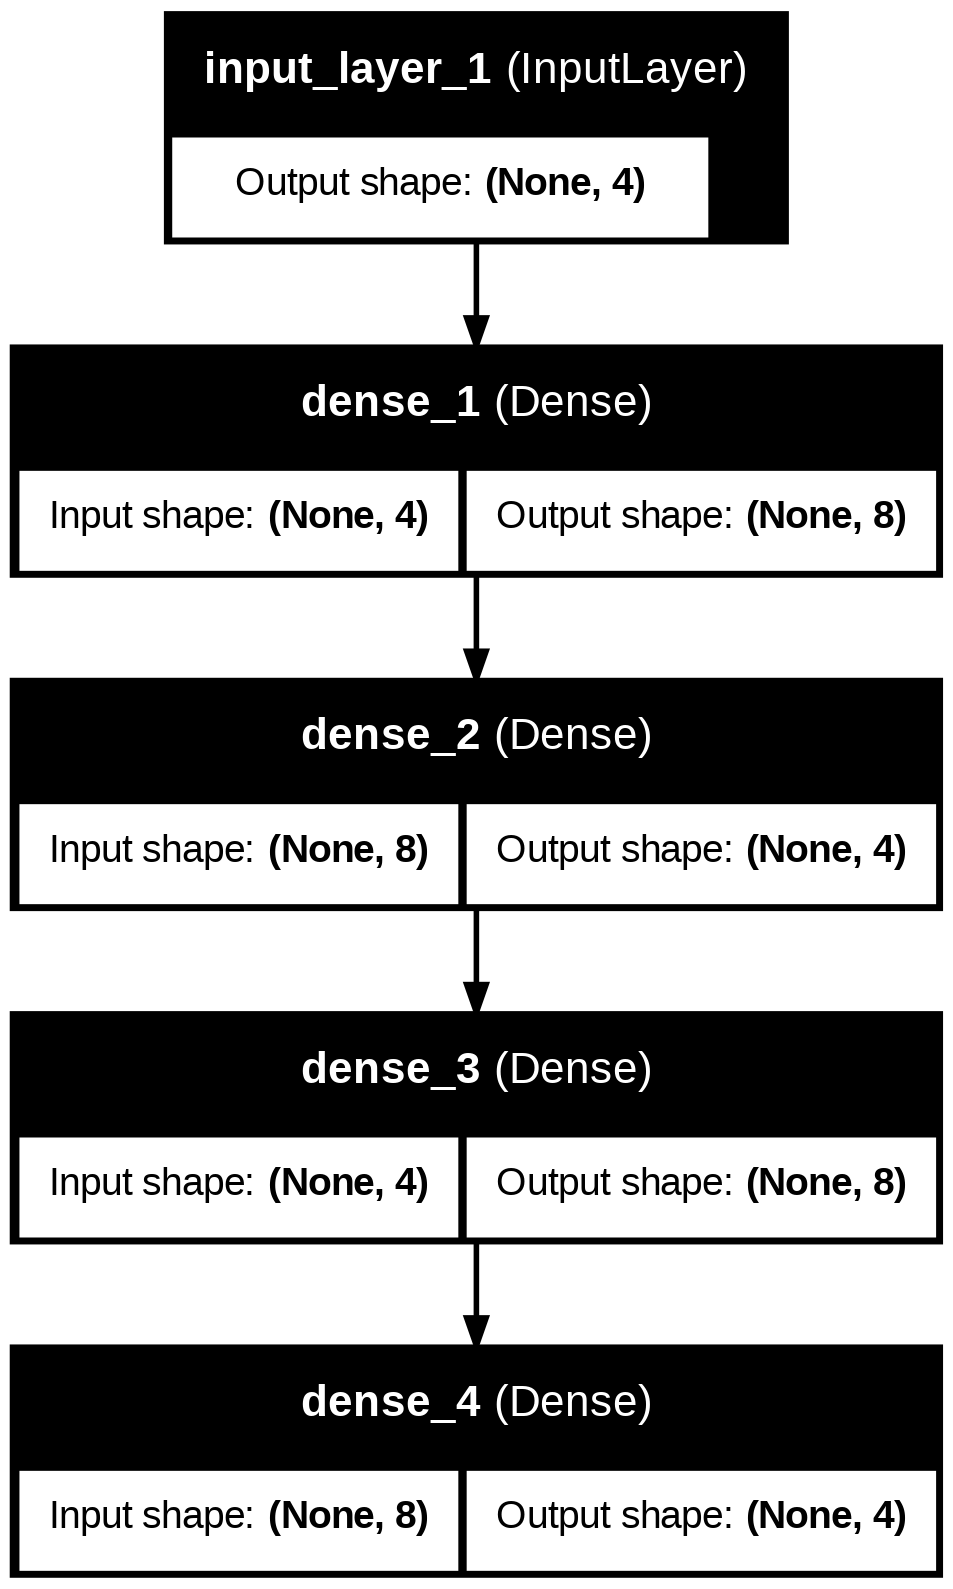

In [47]:
from tensorflow.keras.utils import plot_model

# Save model plot
plot_model(autoencoder, to_file="autoencoder_architecture.png", show_shapes=True, show_layer_names=True)


ROC Curve & Precision-Recall Plot (for LSTM & Feedforward Autoencoder)

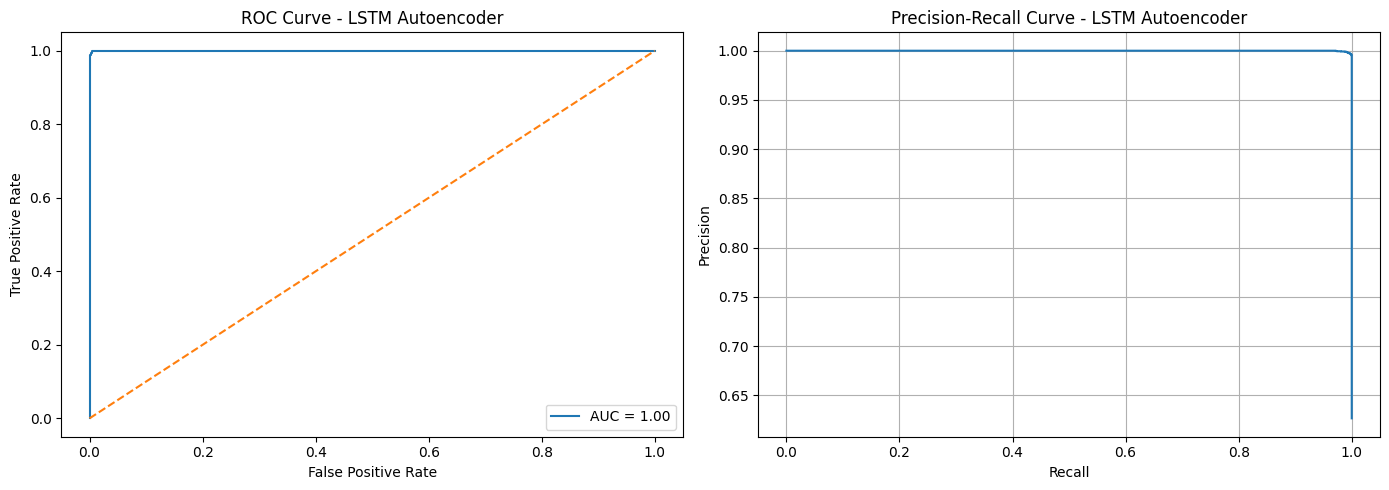

In [48]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt

# ROC Curve
fpr, tpr, _ = roc_curve(y_true_lstm, mse)
roc_auc = auc(fpr, tpr)

# PR Curve
precision, recall, _ = precision_recall_curve(y_true_lstm, mse)

plt.figure(figsize=(14, 5))

# ROC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - LSTM Autoencoder')
plt.legend()

# Precision-Recall Curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - LSTM Autoencoder')
plt.grid()

plt.tight_layout()
plt.show()


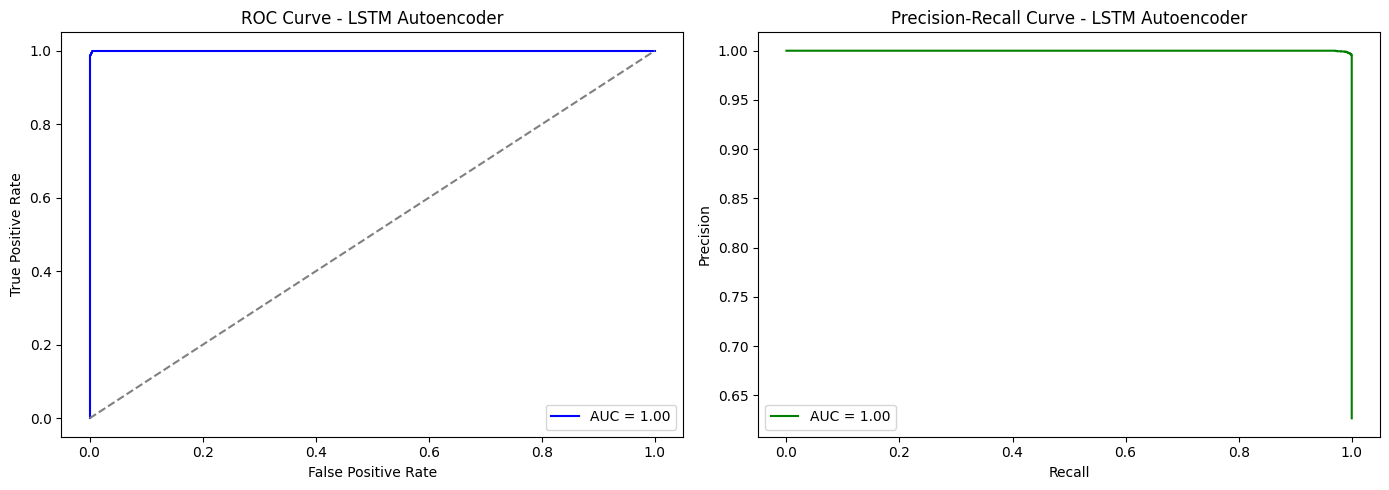

In [49]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt

# ✅ These must be defined from your LSTM Autoencoder run
# y_test = original labels
# mse = reconstruction error from autoencoder
# threshold = 95th percentile from training set

# Step 1: Recreate True Labels (attack = 1, normal = 0)
y_true_lstm = (y_test == 0).astype(int)

# Step 2: Compute ROC and PR
fpr_lstm, tpr_lstm, _ = roc_curve(y_true_lstm, mse)
roc_auc_lstm = auc(fpr_lstm, tpr_lstm)

precision_lstm, recall_lstm, _ = precision_recall_curve(y_true_lstm, mse)
pr_auc_lstm = auc(recall_lstm, precision_lstm)

# Step 3: Plot
plt.figure(figsize=(14, 5))

# ROC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr_lstm, tpr_lstm, label=f'AUC = {roc_auc_lstm:.2f}', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - LSTM Autoencoder')
plt.legend()

# Precision-Recall Curve
plt.subplot(1, 2, 2)
plt.plot(recall_lstm, precision_lstm, label=f'AUC = {pr_auc_lstm:.2f}', color='green')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - LSTM Autoencoder')
plt.legend()

plt.tight_layout()
plt.show()


Architecture Diagram – Feedforward Autoencoder

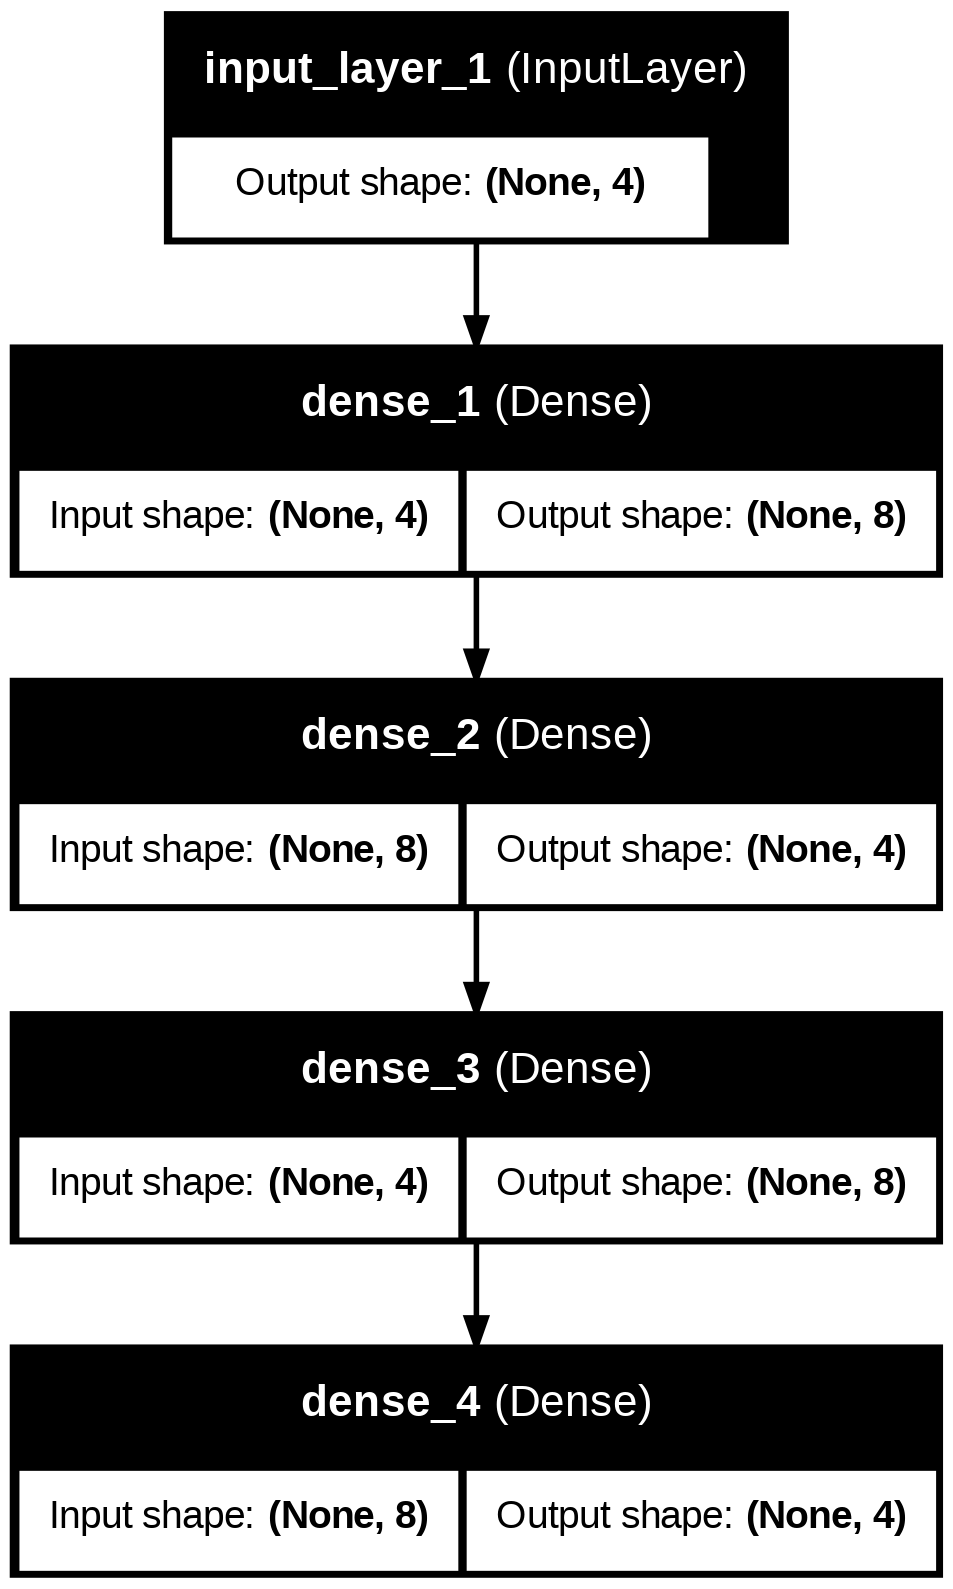

In [50]:
from tensorflow.keras.utils import plot_model
plot_model(autoencoder, show_shapes=True, show_layer_names=True)


** Deployment on Embedded Systems using TensorFlow Lite
A. Convert Trained Keras Model to TFLite**

In [51]:
import tensorflow as tf

# Assume 'model' is your trained Keras model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.target_spec.supported_ops = [
    tf.lite.OpsSet.TFLITE_BUILTINS,         # Built-in ops
    tf.lite.OpsSet.SELECT_TF_OPS            # Fallback to full TF ops (e.g., LSTM)
]
tflite_model = converter.convert()


# Optional: post-training quantization
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# Convert the model
tflite_model = converter.convert()

# Save the model
with open("autoencoder_model.tflite", "wb") as f:
    f.write(tflite_model)


Saved artifact at '/tmp/tmpsfzium2n'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 10, 4), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 10, 4), dtype=tf.float32, name=None)
Captures:
  139475288171216: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139475288172560: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139475288172368: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139475288175248: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139475288171408: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139475288176400: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139475288175440: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139475288176976: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139475288177552: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139475288176592: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139475288178320:

B. Run on Edge Device (e.g., Raspberry Pi)

In [21]:
!pip install tflite-runtime


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 24.6 MB/s eta 0:00:00


In [52]:
import numpy as np
import tensorflow as tf

# STEP 1: Simulate a sequence sample — shape [1, 10, 21]
# Replace this with actual scaled EV data (10 time steps, 21 features)
X_seq = np.random.rand(1, 10, 4).astype(np.float32)

# STEP 2: Load TFLite model
interpreter = tf.lite.Interpreter(model_path="autoencoder_model.tflite")
interpreter.allocate_tensors()

# STEP 3: Get input/output tensor info
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Confirm expected input shape
print("Model expects input shape:", input_details[0]['shape'])

# STEP 4: Run inference
interpreter.set_tensor(input_details[0]['index'], X_seq)
interpreter.invoke()
output_data = interpreter.get_tensor(output_details[0]['index'])

# STEP 5: Compute reconstruction error
reconstruction_error = np.mean(np.square(X_seq - output_data))
print("Reconstruction Error (MSE):", reconstruction_error)


Model expects input shape: [ 1 10  4]
Reconstruction Error (MSE): 0.08295746


In [53]:
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm

# Load your test set (replace this with actual scaled test data)
# Example dummy data with 100 samples and 4 features
X_test = np.random.rand(100, 4).astype(np.float32)

# Parameters
sequence_length = 10
threshold = 0.00445  # use your previously computed LSTM threshold

# Prepare sequences [samples, 10, 4]
sequences = []
for i in range(len(X_test) - sequence_length + 1):
    sequences.append(X_test[i:i+sequence_length])

sequences = np.array(sequences)  # Shape: (num_sequences, 10, 4)

# Load TFLite model
interpreter = tf.lite.Interpreter(model_path="autoencoder_model.tflite")
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Run inference in batch
reconstruction_errors = []
for seq in tqdm(sequences):
    seq = np.expand_dims(seq, axis=0).astype(np.float32)  # shape: [1, 10, 4]
    interpreter.set_tensor(input_details[0]['index'], seq)
    interpreter.invoke()
    output_data = interpreter.get_tensor(output_details[0]['index'])
    mse = np.mean(np.square(seq - output_data))
    reconstruction_errors.append(mse)

# Classify: 1 = anomaly, 0 = normal
predictions = [1 if err > threshold else 0 for err in reconstruction_errors]

print("Sample predictions:", predictions[:10])


100%|██████████| 91/91 [00:00<00:00, 1582.59it/s]

Sample predictions: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [57]:
from sklearn.metrics import classification_report, confusion_matrix

# Align ground truth with predictions
y_test_trunc = y_test[:len(predictions)]

# Evaluation
print("📊 Classification Report:")
print(classification_report(y_test_trunc, predictions, target_names=["Attack (Anomaly)", "Benign (Normal)"]))

print("🧮 Confusion Matrix:")
print(confusion_matrix(y_test_trunc, predictions))


📊 Classification Report:
                  precision    recall  f1-score   support

Attack (Anomaly)       0.00      0.00      0.00      91.0
 Benign (Normal)       0.00      0.00      0.00       0.0

        accuracy                           0.00      91.0
       macro avg       0.00      0.00      0.00      91.0
    weighted avg       0.00      0.00      0.00      91.0

🧮 Confusion Matrix:
[[ 0 91]
 [ 0  0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

# NOW SHAP

In [60]:
# 1. Install dependencies
!pip install tensorflow

# 2. Import libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models

# 3. Load dataset (upload feature_engineered_ev_dataset.csv)
df_scaled = pd.read_csv("feature_engineered_ev_dataset.csv")

# 4. Split features and label
X = df_scaled.drop(columns=['Label_Code']).values
y = df_scaled['Label_Code'].values

# 5. Train-test split
X_train, X_test, _, _ = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Build Autoencoder
input_dim = X_train.shape[1]
encoding_dim = 8

autoencoder = models.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(16, activation='relu'),
    layers.Dense(encoding_dim, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(input_dim, activation='linear')
])

autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(X_train, X_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

# 7. Save model
autoencoder.save("feedforward_autoencoder.h5")
print("✅ Model saved as feedforward_autoencoder.h5")


Epoch 1/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7114 - val_loss: 1.6602
Epoch 2/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5869 - val_loss: 1.1694
Epoch 3/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2899 - val_loss: 0.5646
Epoch 4/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1663 - val_loss: 0.2278
Epoch 5/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0886 - val_loss: 0.0971
Epoch 6/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0323 - val_loss: 0.0615
Epoch 7/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0283 - val_loss: 0.0514
Epoch 8/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0208 - val_loss: 0.0491
Epoch 9/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0380 - val_loss: 0.0447
Epoch 10/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0238 - val_loss: 0.0399
Epoch 11/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0209 - val_loss: 0.0377
Epoch 12/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

✅ Model saved as feedforward_autoencoder.h5


In [62]:
autoencoder.compile(optimizer='adam', loss='mse')


In [63]:
from tensorflow.keras.losses import MeanSquaredError

autoencoder.compile(optimizer='adam', loss=MeanSquaredError())


In [64]:
# 1. Install dependencies (if needed)
!pip install tensorflow

# 2. Import libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
from tensorflow.keras.losses import MeanSquaredError

# 3. Load dataset
df_scaled = pd.read_csv("feature_engineered_ev_dataset.csv")
X = df_scaled.drop(columns=['Label_Code']).values
y = df_scaled['Label_Code'].values

# 4. Train-test split
X_train, X_test, _, _ = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Define model
input_dim = X_train.shape[1]
encoding_dim = 8

autoencoder = models.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(16, activation='relu'),
    layers.Dense(encoding_dim, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(input_dim, activation='linear')
])

# 6. Compile with full loss function, not string
autoencoder.compile(optimizer='adam', loss=MeanSquaredError())

# 7. Train
autoencoder.fit(X_train, X_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

# 8. Save
autoencoder.save("feedforward_autoencoder.h5")
print("✅ Model saved as feedforward_autoencoder.h5")


Epoch 1/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.9965 - val_loss: 1.7249
Epoch 2/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4234 - val_loss: 0.4544
Epoch 3/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1722 - val_loss: 0.1443
Epoch 4/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0926 - val_loss: 0.0866
Epoch 5/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0580 - val_loss: 0.0737
Epoch 6/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0647 - val_loss: 0.0603
Epoch 7/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0397 - val_loss: 0.0501
Epoch 8/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0438 - val_loss: 0.0459
Epoch 9/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0377 - val_loss: 0.0329
Epoch 10/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0234 - val_loss: 0.0278
Epoch 11/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0188 - val_loss: 0.0263
Epoch 12/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

✅ Model saved as feedforward_autoencoder.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


  0%|          | 0/10 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 950us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 955us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 985us/step


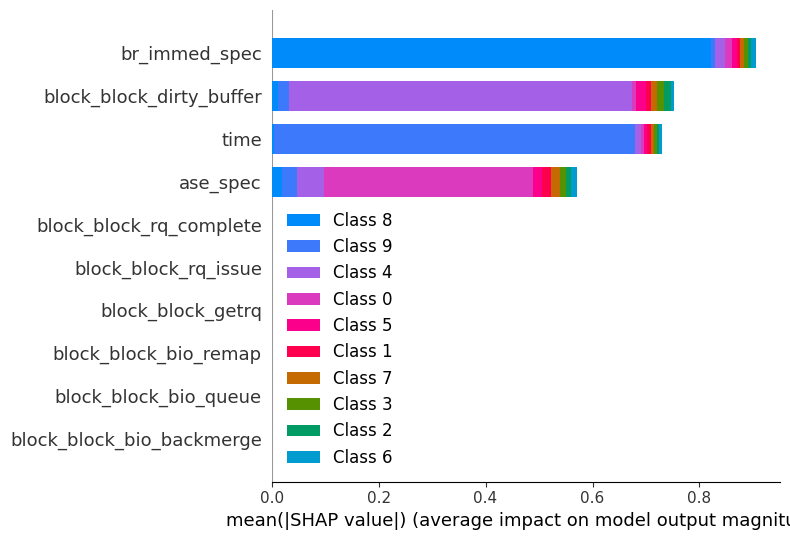

In [65]:
!pip install shap

import shap
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv("feature_engineered_ev_dataset.csv")

# Prepare features and labels
X = df.drop(columns=['Label_Code']).values.astype(np.float32)
y = df['Label_Code'].values
feature_names = df.drop(columns=['Label_Code']).columns.tolist()

# Split for testing
X_train, X_test, _, _ = train_test_split(X, y, test_size=0.2, random_state=42)

# Load feedforward autoencoder
autoencoder = tf.keras.models.load_model("feedforward_autoencoder.h5")

# Use KernelExplainer (works with any black-box model)
explainer = shap.KernelExplainer(autoencoder.predict, X_train[:100])
shap_values = explainer.shap_values(X_train[:10])

# Plot summary
shap.summary_plot(shap_values, X_train[:10], feature_names=feature_names, plot_type='bar')


 # SHAP Explainable AI

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


  0%|          | 0/10 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 985us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


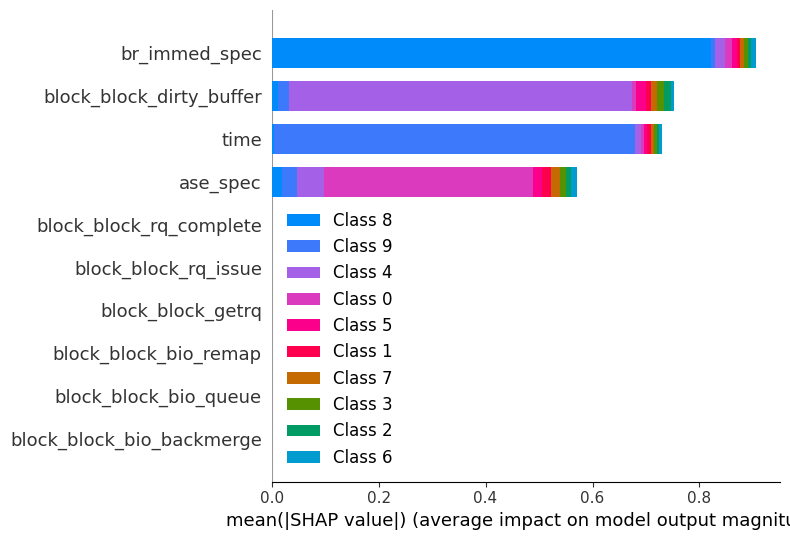

In [66]:
# 1. Install SHAP (only once)
!pip install shap

# 2. Import Libraries
import shap
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 3. Load your saved autoencoder
model = tf.keras.models.load_model("feedforward_autoencoder.h5")

# 4. Load your dataset
df = pd.read_csv("feature_engineered_ev_dataset.csv")
X = df.drop(columns=["Label_Code"]).values.astype(np.float32)
y = df["Label_Code"].values
feature_names = df.drop(columns=["Label_Code"]).columns.tolist()

# 5. Split for interpretability
X_train, X_test, _, _ = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Use SHAP KernelExplainer (black-box explainer)
explainer = shap.KernelExplainer(model.predict, X_train[:100])
shap_values = explainer.shap_values(X_train[:10])

# 7. SHAP Summary Plot
shap.summary_plot(shap_values, X_train[:10], feature_names=feature_names, plot_type='bar')


In [68]:
# 1. Install TensorFlow if needed
!pip install tensorflow

# 2. Import Libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split

# 3. Load Dataset
df = pd.read_csv("feature_engineered_ev_dataset.csv")
X = df.drop(columns=['Label_Code']).values.astype(np.float32)

# 4. Create sequences
sequence_length = 10
def create_sequences(data, seq_len):
    return np.array([data[i:i+seq_len] for i in range(len(data) - seq_len + 1)])

X_seq = create_sequences(X, sequence_length)

# 5. Train-test split
train_size = int(0.8 * len(X_seq))
X_train_seq = X_seq[:train_size]
X_test_seq = X_seq[train_size:]

# 6. Define LSTM Autoencoder
model = models.Sequential([
    layers.Input(shape=(sequence_length, X.shape[1])),
    layers.LSTM(64, return_sequences=True),
    layers.LSTM(32, return_sequences=False),
    layers.RepeatVector(sequence_length),
    layers.LSTM(32, return_sequences=True),
    layers.LSTM(64, return_sequences=True),
    layers.TimeDistributed(layers.Dense(X.shape[1]))
])

model.compile(optimizer='adam', loss='mse')
model.summary()

# 7. Train the model
model.fit(X_train_seq, X_train_seq, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

# 8. Save the model
model.save("lstm_autoencoder.h5")
print("✅ Model saved as lstm_autoencoder.h5")



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 10, 64)         │        19,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector_1 (RepeatVector)  │ (None, 10, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 10, 32)         │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 10, 64)         │        24,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_1              │ (None, 10, 10)         │           650 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 65,418 (255.54 KB)

 Trainable params: 65,418 (255.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - loss: 1.0590 - val_loss: 0.5447
Epoch 2/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.4901 - val_loss: 0.5526
Epoch 3/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.6592 - val_loss: 0.8580
Epoch 4/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.3597 - val_loss: 1.9514
Epoch 5/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.5314 - val_loss: 7.7077
Epoch 6/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - loss: 0.4614 - val_loss: 9.6393
Epoch 7/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.4600 - val_loss: 5.9455
Epoch 8/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 0.3608 - val_loss: 13.2686
Epoch 9/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.4120 - val_loss: 6.1888
Epoch 10/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.2909 - val_loss: 4.4753
Epoch 11/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.4509 - val_loss: 7.6331
Epoch 12/50
191/191 ━━━━━━━━━━━━━━━━━━━━

✅ Model saved as lstm_autoencoder.h5
